# SIADS 502: Math Methods for Data Science 


# School of Information, University of Michigan


## Week2: Linear Independence and Eigenvalue/Eigenvector

### Version 1.2

This assignment covers basic linear algebra and computational properties of matrices through identifying linearity across vectors, using row reduction to calculate eigenvalues and eigenvectors. 

Please enter your name: "Varshini Rana"

## Part 1: Linear (In)dependence


<b>1.0</b> In this section, we will be determining if a set of vectors are linearly independent (if they are not, then they are linearly dependent). Below you will be asked to write a function to decide if 2, 3, or 4 inputed vectors in $\mathbf{R}^3$ are linearly independent.  


    


In [1]:
from sympy import *
import numpy as np
from scipy import linalg
from numpy import linalg
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




<strong>1.1</strong> \[2 pt\] Impliment the function Indy2Vec that takes in two 3 dimentional vectors each represented as an array and returns <strong>True</strong> if the are linearly independent, and otherwise returns <strong>False</strong>.

Hint: Beware of rounding errors.


In [2]:
def Indy2Vec(v1, v2):
    
# YOUR CODE HERE
    
    # create a matrix out of the 2 vectors
    mat=np.array([v1,v2])
    
    # get reduced row echelon form of matrix and the indices of the pivot columns
    rref, indices = Matrix(mat).T.rref()
    
    # True: linearly independent, False: linearly dependent
    if len(indices) == 2:
        return True
    else:
        return False

# raise NotImplementedError()

In [3]:
v1 = np.array([0, 5, 0])
v2 = np.array([0, -10, 0])
v3 = np.array([1, 2, 3])
v4 = np.array([-2, -4, -6])
assert Indy2Vec(v1, v2) == False, "Problem 1.1, Your code said that two linearly dependent vectors were independent"
assert Indy2Vec(v3, v4) == False, "Problem 1.1, Your code said that two linearly dependent vectors were independent"
assert Indy2Vec(v1, v3) == True, "Problem 1.1, Your code said that two linearly independent vectors were dependent"
assert Indy2Vec(v2, v3) == True, "Problem 1.1, Your code said that two linearly independent vectors were dependent"

<strong>1.2</strong> \[2 pt\] Impliment the function <strong>Indy2Vec</strong> that takes in three 3 dimentional vectors each represented as an array and returns <strong>True</strong> if the are linearly independent, and otherwise returns <strong>False</strong>.

In [4]:
def Indy3Vec(v1, v2, v3):
    
# YOUR CODE HERE
    
    # create a matrix out of the 3 vectors
    mat=np.array([v1,v2,v3])
    
    # get reduced row echelon form of matrix and the indices of the pivot columns
    rref, indices = Matrix(mat).T.rref()
    
    # True: linearly independent, False: linearly dependent
    if len(indices) == 3:
        return True
    else:
        return False

# raise NotImplementedError()

In [5]:
v1=np.array([-1,3,4])
v2=np.array([6,-2,9])
v3=np.array([3,8,5]) 

assert Indy3Vec(v1, v2, v3) == True, "Problem 1.2, Your code said that three linearly independent vectors were dependent"

<strong>1.3</strong> \[1 pt\] Impliment the function <strong>Indy4Vec</strong> that takes in four 3 dimentional vectors each represented as an array and tells whether they are linearly independent.

Hint: This is a bit of a trick question.

In [6]:
def Indy4Vec(v1, v2, v3, v4):
    
# YOUR CODE HERE

    # create a matrix out of the 4 vectors
    mat=np.array([v1,v2,v3,v4])
    
    # get reduced row echelon form of matrix and the indices of the pivot columns
    rref, indices = Matrix(mat).T.rref()
    
    # True: linearly independent, False: linearly dependent
    if len(indices) == 4:
        return True
    else:
        return False

# raise NotImplementedError()

In [7]:
v1=np.array([-1,3,4])
v2=np.array([6,-2,9])
v3=np.array([3,8,5])
v4=np.array([5,6,7])


assert Indy4Vec(v1, v2, v3, v4) == False, "Problem 1.3, Your code said that four linearly dependent vectors were independent"

<strong>1.4</strong> \[2 pt\] Impliment the function <strong>ThreeVec</strong> that takes in three 3 dimentional vectors each represented as an array, creates a matrix from stacking the arrays vertically (each array is a row in a matrix), and returns a list in which:
* the first element is the rank of the matrix, 
* the second element is the rank of its transpose, 
* the third element is its determinant, 
* the fourth element is the inverse if its inverse exists and is the string "no inverse" if it does not exist.





In [8]:
def ThreeVec(v1, v2, v3):
    
    #YOUR CODE HERE
    
    # create a matrix out of the 3 vectors
    mat=np.array([v1,v2,v3])
    
    # create an empty list which would store the results
    results=[]
    
    # rank of matrix
    rank=np.linalg.matrix_rank(mat)
    results.append(rank)
    
    # rank of transpose of matrix
    rank_T=np.linalg.matrix_rank(mat.T)
    results.append(rank_T)
    
    # determinant of matrix
    det=np.linalg.det(mat)
    results.append(det)
    
    # if determinant of matrix is 0 or close to it, no inverse exists for the matrix
    if np.isclose(det, 0):
        inv="no inverse"
    else:
        inv=np.linalg.inv(mat)
    results.append(inv)
    
    return results
    
# raise NotImplementedError()

In [9]:
v1=np.array([10,4.4,13])
v2=np.array([-5,-3.1,4])
v3=np.array([15,5.7,30])



assert(ThreeVec(v1, v2, v3)[0:2] == [2, 2]), "Problem 1.4, Your function does not compute the example correctly."
assert(np.isclose(ThreeVec(v1, v2, v3)[2], 0)), "Problem 1.4, Your function does not compute the example correctly."
assert(ThreeVec(v1, v2, v3)[3] == "no inverse"), "Problem 1.4, Your function does not compute the example correctly."









<strong>1.5</strong> [3 pt] Given a matrix $A$ (as an np.array), find a vector $v$ (as an np.array with "shape" $(3, )$) as follows: 

If $A$ it is bijective: find $v$ such that $Av=\left(\begin{array}{c} 1 \\ 2 \\ 1 \end{array} \right)$. 

If $A$ is surjective but not injective: find $v$ such that $Av= A\left(\begin{array}{c} 1 \\ 1 \\ 1 \end{array} \right)$ where $v$ does not equal $\left(\begin{array}{c} 1 \\ 1 \\ 1 \end{array} \right)$. 

If $A$ is injective but not  surjective: find $v$ such that its first two elements are 1 and $v$ is in the image of $A$.  In otherwords: $v = \left(\begin{array}{c} 1 \\ 1 \\ z \end{array} \right)$ and $v= Ax$ for some vector $x$.  Essentially, in this case you must solve for z.

Note: For this problem $A$ will always be injective, surjective, or bijective



(a) $A= \left(\begin{array}{ccc} 1 & 2 & 3 \\ 2 & 1 & 1 \end{array} \right)$

In [10]:
A= np.array([[1,2,3],[2,1,1]])
# A is a 2x3 matrix
# the rank of A is 2
# A is surjective

v=np.array([2,-4,4])
#YOUR CODE HERE

# YOUR CODE HERE
# raise NotImplementedError()

In [11]:
#hidden tests for problem 1.5(a) are within this cell

(b) $A= \left(\begin{array}{cc} 1 & 2 \\ 3  & 4 \\ 10 & 6 \end{array} \right)$

In [12]:
A = np.array([[1, 2], [3, 4], [10, 6]])
# A is a 3x2 matrix
# the rank of A is 2
# A is injective

v=np.array([1,1,-4])
#YOUR CODE HERE

# YOUR CODE HERE
# raise NotImplementedError()

In [13]:
#hidden tests for problem 1.5(b) are within this cell

(c) $A= \left(\begin{array}{cc} 1 & 2 & 3 \\ 3  & 4 & 5\\ 4 & 10 & 6 \end{array} \right)$

In [14]:
A= np.array([[1,2,3],[3,4,5],[4,10,6]])
# A is a 3x3 matrix
# the rank of A is 3
# A is bijective

v=np.array([0.4, -0.3, 0.4])
#YOUR CODE HERE

# YOUR CODE HERE
# raise NotImplementedError()

In [15]:
#hidden tests for problem 1.5(c) are within this cell

## Part 2: Eigenvalues/ Eigenvectors


<strong>2.1</strong> \[1 pt\] What are the eigenvalue and eigenvectors of the matrix $A = \left(\begin{array}{cc} 1  & 3 \\ 2  & 5\end{array} \right)$? Please store the eigenvalues in the variable called <strong>vals</strong>. The datatype for vals should be a numpy array.



In [16]:
A= np.array([[1,3],[2,5]])

vals=np.linalg.eigvals(A)
# YOUR CODE HERE
# raise NotImplementedError()

In [17]:
#hidden tests for problem 2.1 are within this cell

<strong>2.2</strong> \[1 pt\] What are the eigenvectors of the matrix $\left(\begin{array}{cc} 1  & 3 \\ 2  & 5\end{array} \right)$? Please store the eigenvectors in variables $v1$ and $v2$ as numpy arrays of shape (2,).



In [18]:
vecs=np.linalg.eig(A)[1]
v1=np.array([vecs[0][0], vecs[1][0]])
v2=np.array([vecs[0][1], vecs[1][1]])
# YOUR CODE HERE
# raise NotImplementedError()

In [19]:
#hidden tests for problem 2.2 are within this cell

<strong>2.3</strong> \[2 pt\] Find a 2 x 2 matrix with integer entries that has 10 and 25 as eigenvalues with eigen vectors $(1, 4)$ and $(1, -1)$ respectively.  Record it as an array in <strong>ANS23</strong> with integer entries.  

Hint: Put variables for entries in a 2 x 2 array $\left(\begin{array}{cc} a_{11}  & a_{12} \\ a_{21}  & a_{22} \end{array} \right)$, write out the equations that must be satisfied, and solve.

In [20]:
# diagonal matrix with eigenvalues as the diagonal values
D=np.array([[10,0],[0,25]])

# matrix with eigenvectors as the columns
P=np.array([[1,4],[1,-1]]).T

# inverse of matrix P
P_inv=np.linalg.inv(P)

# the answer is PDP^-1
ANS23 = np.dot(np.dot(P,D),P_inv)
    

# YOUR CODE HERE
# raise NotImplementedError()


In [21]:
assert type(ANS23) == np.ndarray, "Problem 2.3, Your answer should be an array"
assert ANS23.shape == (2, 2), "Problem 2.3, Your array should be dimension 2 x 2"

assert np.isclose(ANS23 @ np.array([1, 4]), np.array([10, 40])).all(), "Problem 2.3, Your array should have [1, 4] as an eigenvector with eigenvalue 10"





2.4 [2 pt] Use the txt files loaded below to find the principal components of the Senate dataset (from around 2007) and to make a scatterplot with PC1 on the x-axis and PC2 on the y-axis (i.e. a senator's location on the scatterplot is his/her (PC1 loading, PC2 loading)), and where each senator's dot is the color of his political party. 

Run the below lines of code to load and view snippets of txt files.

In [22]:
Senate = pd.read_csv('assets/senate.txt')

Senate.head()



,-1,bill_type bill_name bill_ID,missing_votes,Arlen Specter (PA),Barack H. Obama (IL),BarbaraA Mikulski(MD),BarbaraBoxer(CA),Bill Nelson(FL),BlancheL.Lincoln(AR),ByronL.Dorgan(ND),...,SusanM.Collins(ME),TedStevens(AK),ThadCochran(MS),ThomasAllen'Tom'Coburn(OK),ThomasRichardCarper(DE),Thomas'Tom'Harkin(IA),TimP.Johnson(SD),TrentLott(MS),WayneA.Allard(CO),WilliamH.Frist(TN)
0,0,Appropriations_Transit Security Amendment_3866,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
1,1,Budget_Spending_and_Taxes_2007 Budget Resoluti...,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
2,2,"""Budget, Spending and Taxes_Debt Limit Increas...",0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
3,3,"Budget, Spending and Taxes_Education Funding A...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
4,4,"Budget, Spending and Taxes_Reinstate Pay-As-Yo...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0


In [23]:
RB = pd.read_csv('assets/red_blue.txt', ' ')

RB.head()

,Name,Color
0,Specter,Red
1,Obama,Blue
2,Mikulski,Blue
3,Boxer,Blue
4,Nelson,Blue


In [24]:
#Use "iloc" to remove the first three columns from the Senate dataset
Senate1= Senate.iloc[:,3:]

#Use the sklearn "StandardScaler" package and its fit_transform method to standardize Senate1
scaler = StandardScaler()
Senate2= scaler.fit_transform(Senate1)

#Use the sklearn "PCA" package to define a PCA model ("pca_senators") which will keep the first five eigenvalues and eigenvectors. 
#Then define an object ("results_senators") by applying the pca_senators model to the Senate2 dataset using the fit method. 
pca_senators= PCA(n_components=5)
results_senators= pca_senators.fit(Senate2)

#Finally, define eig_vals and eig_vecs by accessing the attributes of the results_senators object
eig_vals= results_senators.explained_variance_
eig_vecs= results_senators.components_

# YOUR CODE HERE
# raise NotImplementedError()

In [25]:
#hidden tests for problem 2.4 are within this cell

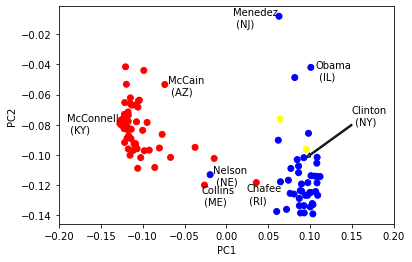

In [26]:
#run this cell to make a scatter plot using your results
plt.scatter(results_senators.components_[0], results_senators.components_[1], c=RB['Color'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.annotate("Nelson\n (NE)", (-0.0155, -0.12))
plt.annotate("McConnell\n (KY)", (-0.19, -0.085))
plt.annotate("Chafee\n (RI)", (0.024, -0.132))
plt.annotate("Obama\n (IL)", (0.107, -0.05))
plt.annotate("Menedez\n (NJ)", (0.008, -0.015))
plt.annotate("Collins\n (ME)", (-0.03, -0.133))
plt.annotate("Clinton\n (NY)", (0.15, -0.08))
plt.annotate("McCain\n (AZ)", (-0.07, -0.06))
plt.arrow(0.15,-0.08,-0.05,-0.02)
plt.xlim(-0.2, 0.2)
plt.show()

## Part 3: Composition 


<strong>3.1</strong> \[1 pt\] Assume $f(x)= 3x+6$ and $g(y)= 2y+1$, what is the reduced equation of $h(x)=g \circ f(x)=g(f(x))$? Store your answer in the variable <strong>compo</strong> as a string type that is a valid python formula.  For example, "5 * x ** 2 + 4".  Note that neither "5 x ** 2 + 4" nor ""5 * x ^ 2 + 4" are valid python formulas.

In [27]:
compo="6*x+13"
# YOUR CODE HERE
# raise NotImplementedError()

In [28]:
assert type(compo) == str, "Problem 3.1, testing compo, type of value stored in variable does not match the expected type. Expecting String."

<strong>3.2</strong> \[1 pt\] Given x = 1, use the equation assigned to compo to solve. Store your answer in the variable <strong>compo1</strong> as an integer. 

In [29]:
compo1=19
# YOUR CODE HERE
# raise NotImplementedError()

In [30]:
import numbers
assert isinstance(compo1, numbers.Number), "Problem 3.2, testing compo1, type of value stored in variable does not match the expected type. Expecting Integer."